In [1]:
import warnings
warnings.filterwarnings('ignore')
def fig2data(fig):
    """
    fig = plt.figure()
    image = fig2data(fig)
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    import PIL.Image as Image
    # draw the renderer
    fig.canvas.draw()
 
    # Get the RGBA buffer from the figure
    w, h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (w, h, 4)
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll(buf, 3, axis=2)
    image = Image.frombytes("RGBA", (w, h), buf.tostring())
    image = np.asarray(image)
    return image


In [2]:
import librosa
import scipy
import statistics
from skimage import data, color
import math
import librosa.display
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from os import path
from pydub import AudioSegment
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
def spectro(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro2(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    n_fft = 2048
    freqs, times, mags = librosa.reassigned_spectrogram(y= y, sr=sr)
    mags_db = librosa.power_to_db(mags, ref= np.max)
    fig, ax = plt.subplots(nrows=2,sharex= True, sharey=True)
    img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, ax=ax[0])
    ax[0].set(title="Spectrogram", xlabel=None)
    ax[0].label_outer()
    ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
    ax[1].set_title("Reassigned spectrogram")
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    
def spectro3(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y, center = False)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -30:
                S[row][element] = -80
                
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
def spectro4(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(ndimage.median_filter(S,size=5),
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
def spectro5(archivo,cut):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -cut:
                S[row][element] = -80
    S = ndimage.median_filter(S,size=5)            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro6(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(ndimage.gaussian_filter(S,sigma=1),
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro7(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y, center = False)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5)  
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -30:
                S[row][element] = -80
              
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
    
def spectro8(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    y = sp.signal.medfilt(y,7)
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5) 
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -25:
                S[row][element] = -80
            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")   
    
    
def spectro9(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    y = sp.signal.medfilt(y,5)
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5) 
    
    
    
            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")   
        
def spectro5_ex(archivo,corte = 25):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = -80
    S = ndimage.median_filter(S,size=5) 
    X_sc = []
    Y_sc = []
    
    
    
    
    print(S.shape)
    
    fig, ax = plt.subplots()
    
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=None)
    
    
    fig.canvas.draw()
    
    
    
    
    
    j = fig2data(fig)
    j = color.rgb2gray(j)
    print(j.shape)
    X_sc = []
    Y_sc = []
    for x in range(j.shape[1]):
        for y in range(j.shape[0]-1,-1,-1):
            
            if j[y][x] > 0.20 and j[y][x] < 1 :
                
                
                X_sc.append(x)
                Y_sc.append(j.shape[0]-y)
                break
    
    """
    X_sc.append(30)
    Y_sc.append(30)
    X_sc.append(j.shape[1])
    Y_sc.append(j.shape[0])
    """
    fig, ax = plt.subplots()
    plt.scatter(X_sc,Y_sc,s=1.5)
    plt.show()
    X_scp = []
    Y_scp = []
    
    for x in range(j.shape[1]):
        Y_fly = []
        for y in range(j.shape[0]-1,0,-1):
            
            if (j[y][x]-j[y-1][x]) == 0 and j[y][x] > 0.20 and j[y][x] < 1 :
                Y_fly.append((j.shape[0]-y))
                
        if len(Y_fly) != 0:
            res =  statistics.mean(Y_fly)
            X_scp.append(x)
            Y_scp.append(res)
        
        
    print(len(X_scp))
    print(len(Y_scp))
    fig, ax = plt.subplots()
    plt.scatter(X_scp,Y_scp,s=1.5)
    plt.show()
        
        
def spectro_mel(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"
    hop_length = 512
    n_fft = 512
    n_mels = 128
    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
        
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results    
        
def spectro10(archivo, corte,exclude, ventana, hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length=hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for row in range(S.shape[0]):
        for element in range(S.shape[1]):
            if S[row][element] == 1:
                fitting.append([row, element])
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
        
               
    
    
    
    
    
    
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                anotation.append([row,column])
                S[row][column] = 2
                control = 1
                break
        if control == 0:
            anotation.append([-8, column])
    
      
    resul_anotation = []
    
    
    
    
    for x in range(len(anotation)-1):
        if anotation[x][0] == -8 or anotation[x][1] == -8:
            resul_anotation.append( 0)
        else:
            slope = (anotation[x+1][0] - anotation[x][0])
            if slope < 0:
                resul_anotation.append(0.25)
            elif slope == 0:
                resul_anotation.append(1)
            else:
                resul_anotation.append(0.75)
    resul_anotation.append(0)
    resul_anotation = scipy.signal.medfilt(resul_anotation,kernel_size=5)
    
    S = np.vstack([S,np.array([resul_anotation,]*10) ])
    
    plt.figure(figsize = (30,30))
    plt.imshow(S,origin="lower")
    plt.show()
    
        
        
def pendiente(x,y):
    result = []
    if len(x) == len(y):
        for i in range(0,len(x)-1):
            result.append((y[i+1]-y[i])/(x[i+1]-x[i]))
    return(result)
            
            
        
def aislamiento_fitting(archivo, corte,exclude, agrupacion,ventana,hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length = hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                fitting.append([row,column])
               
                control = 1
                break
        
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
    if len(grupos_fly) != 0:
            grupos.append(grupos_fly)
    
    if len(grupos) != 0:
        
        workin = grupos[agrupacion]

        X = [x[1] for x in workin]
        Y = [x[0] for x in workin]
        df = pd.DataFrame( {"x":X, "y":Y})
        
        #fit polynomial models up to degree 5
        models = {}
        for z in range(1, 6):
            models["model{}".format(str(z))] = np.poly1d(np.polyfit(df.x, df.y, z))



        #calculated adjusted R-squared of each model
        

        best_fit = sorted([["model{}".format(str(i)),adjR(df.x, df.y, i)["r_squared"]] for i in range(1, 6)],reverse=True,key = lambda x: x[1] )[0]

        
        modelo = models[best_fit[0]]
       
        plt.scatter(df.x, df.y)  
        plt.plot(X, modelo(X), color='green')
        plt.show()
        derivada = modelo.deriv()
        plt.plot(X, derivada(X), color="blue")
        plt.show()
        spectro10(archivo,corte=corte, exclude=exclude,ventana=ventana,hop=hop, win = win)
    
    else:
        print("No se ha podido agrupar")
    
    
    
    
    
    
def aislamiento_fitting_2(archivo, corte,exclude, agrupacion,ventana,hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length = hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                fitting.append([row,column])
               
                control = 1
                break
        
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
    if len(grupos_fly) != 0:
            grupos.append(grupos_fly)
    
    if len(grupos) != 0:
        
        workin = grupos[agrupacion]

        X = [x[1] for x in workin]
        Y = [x[0] for x in workin]
       
        df = pd.DataFrame( {"x":X, "y":Y})
        
        #fit polynomial models up to degree 5
        models = {}
        for z in range(1, 6):
            models["model{}".format(str(z))] = np.poly1d(np.polyfit(df.x, df.y, z))



        #calculated adjusted R-squared of each model
        

        best_fit = sorted([["model{}".format(str(i)),adjR(df.x, df.y, i)["r_squared"]] for i in range(1, 6)],reverse=True,key = lambda x: x[1] )[0]

        
        modelo = models[best_fit[0]]
       
        plt.scatter(df.x, df.y)  
        plt.plot(X, modelo(X), color='green')
        plt.show()
        derivada = modelo.deriv()
        plt.plot(X, derivada(X), color="blue")
        plt.show()
        plt.plot([x/X[0] for x in X], [y/Y[0] for y in Y], color="blue")
        plt.show()
        print("Ratio tono menor / tono mayor ",'{:.18}'.format(min(Y)/max(Y)))
        spectro10(archivo,corte=corte, exclude=exclude,ventana=ventana,hop=hop, win = win)
        
    else:
        print("No se ha podido agrupar") 
    
    
import librosa
import scipy
import statistics
from skimage import data, color
import math
import librosa.display
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from os import path
from pydub import AudioSegment
import scipy as sp
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
def spectro(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro2(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    n_fft = 2048
    freqs, times, mags = librosa.reassigned_spectrogram(y= y, sr=sr)
    mags_db = librosa.power_to_db(mags, ref= np.max)
    fig, ax = plt.subplots(nrows=2,sharex= True, sharey=True)
    img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, ax=ax[0])
    ax[0].set(title="Spectrogram", xlabel=None)
    ax[0].label_outer()
    ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
    ax[1].set_title("Reassigned spectrogram")
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    
def spectro3(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y, center = False)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -30:
                S[row][element] = -80
                
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
def spectro4(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(ndimage.median_filter(S,size=5),
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
def spectro5(archivo,cut):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -cut:
                S[row][element] = -80
    S = ndimage.median_filter(S,size=5)            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro6(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False))
    
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(ndimage.gaussian_filter(S,sigma=1),
                                                          ref=np.max),
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
def spectro7(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y, center = False)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5)  
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -30:
                S[row][element] = -80
              
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title("Power spectrogram")
    fig.colorbar(img,ax=ax,format="%+2.0f db")
    
    
def spectro8(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    y = sp.signal.medfilt(y,7)
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5) 
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -25:
                S[row][element] = -80
            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")   
    
    
def spectro9(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    y = sp.signal.medfilt(y,5)
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    S = ndimage.median_filter(S,size=5) 
    
    
    
            
    fig, ax = plt.subplots()
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=ax)
    ax.set_title(archivo)
    fig.colorbar(img,ax=ax,format="%+2.0f db")   
        
def spectro5_ex(archivo,corte = 25):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
     
    S = librosa.amplitude_to_db(np.abs(librosa.stft(y)),
                                                        ref=np.max)
    
    
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = -80
    S = ndimage.median_filter(S,size=5) 
    X_sc = []
    Y_sc = []
    
    
    
    
    print(S.shape)
    
    fig, ax = plt.subplots()
    
    img = librosa.display.specshow(S,
                                  y_axis="log",x_axis="time",ax=None)
    
    
    fig.canvas.draw()
    
    
    
    
    
    j = fig2data(fig)
    j = color.rgb2gray(j)
    print(j.shape)
    X_sc = []
    Y_sc = []
    for x in range(j.shape[1]):
        for y in range(j.shape[0]-1,-1,-1):
            
            if j[y][x] > 0.20 and j[y][x] < 1 :
                
                
                X_sc.append(x)
                Y_sc.append(j.shape[0]-y)
                break
    
    """
    X_sc.append(30)
    Y_sc.append(30)
    X_sc.append(j.shape[1])
    Y_sc.append(j.shape[0])
    """
    fig, ax = plt.subplots()
    plt.scatter(X_sc,Y_sc,s=1.5)
    plt.show()
    X_scp = []
    Y_scp = []
    
    for x in range(j.shape[1]):
        Y_fly = []
        for y in range(j.shape[0]-1,0,-1):
            
            if (j[y][x]-j[y-1][x]) == 0 and j[y][x] > 0.20 and j[y][x] < 1 :
                Y_fly.append((j.shape[0]-y))
                
        if len(Y_fly) != 0:
            res =  statistics.mean(Y_fly)
            X_scp.append(x)
            Y_scp.append(res)
        
        
    print(len(X_scp))
    print(len(Y_scp))
    fig, ax = plt.subplots()
    plt.scatter(X_scp,Y_scp,s=1.5)
    plt.show()
        
        
def spectro_mel(archivo):
    # files                                                                         
    src = archivo
    dst = "test.wav"
    hop_length = 512
    n_fft = 512
    n_mels = 128
    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
        
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results    
        
def spectro10(archivo, corte,exclude, ventana, hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length=hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for row in range(S.shape[0]):
        for element in range(S.shape[1]):
            if S[row][element] == 1:
                fitting.append([row, element])
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
        
               
    
    
    
    
    
    
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                anotation.append([row,column])
                S[row][column] = 2
                control = 1
                break
        if control == 0:
            anotation.append([-8, column])
    
      
    resul_anotation = []
    
    
    
    
    for x in range(len(anotation)-1):
        if anotation[x][0] == -8 or anotation[x][1] == -8:
            resul_anotation.append( 0)
        else:
            slope = (anotation[x+1][0] - anotation[x][0])
            if slope < 0:
                resul_anotation.append(0.25)
            elif slope == 0:
                resul_anotation.append(1)
            else:
                resul_anotation.append(0.75)
    resul_anotation.append(0)
    resul_anotation = scipy.signal.medfilt(resul_anotation,kernel_size=5)
    
    S = np.vstack([S,np.array([resul_anotation,]*10) ])
    
    plt.figure(figsize = (30,30))
    plt.imshow(S,origin="lower")
    plt.show()
    
        
        
def pendiente(x,y):
    result = []
    if len(x) == len(y):
        for i in range(0,len(x)-1):
            result.append((y[i+1]-y[i])/(x[i+1]-x[i]))
    return(result)
            
            
        
def aislamiento_fitting(archivo, corte,exclude, agrupacion,ventana,hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length = hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                fitting.append([row,column])
               
                control = 1
                break
        
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
    if len(grupos_fly) != 0:
            grupos.append(grupos_fly)
    
    if len(grupos) != 0:
        
        workin = grupos[agrupacion]

        X = [x[1] for x in workin]
        Y = [x[0] for x in workin]
        df = pd.DataFrame( {"x":X, "y":Y})
        
        #fit polynomial models up to degree 5
        models = {}
        for z in range(1, 6):
            models["model{}".format(str(z))] = np.poly1d(np.polyfit(df.x, df.y, z))



        #calculated adjusted R-squared of each model
        

        best_fit = sorted([["model{}".format(str(i)),adjR(df.x, df.y, i)["r_squared"]] for i in range(1, 6)],reverse=True,key = lambda x: x[1] )[0]

        
        modelo = models[best_fit[0]]
       
        plt.scatter(df.x, df.y)  
        plt.plot(X, modelo(X), color='green')
        plt.show()
        derivada = modelo.deriv()
        plt.plot(X, derivada(X), color="blue")
        plt.show()
        spectro10(archivo,corte=corte, exclude=exclude,ventana=ventana,hop=hop, win = win)
    
    else:
        print("No se ha podido agrupar")
    
    
    
    
    
    
def aislamiento_fitting_normalizado(archivo, corte,exclude, agrupacion,ventana,hop,win):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length = hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                fitting.append([row,column])
               
                control = 1
                break
        
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
    if len(grupos_fly) != 0:
            grupos.append(grupos_fly)
    
    if len(grupos) != 0:
        
        workin = grupos[agrupacion]

        X = [x[1] for x in workin]
        Y = [x[0] for x in workin]
        X =  [x/X[0] for x in X]
        Y = [y/Y[0] for y in Y]
        df = pd.DataFrame( {"x":X, "y":Y})
        
        #fit polynomial models up to degree 5
        models = {}
        for z in range(1, 6):
            models["model{}".format(str(z))] = np.poly1d(np.polyfit(df.x, df.y, z))



        #calculated adjusted R-squared of each model
        

        best_fit = sorted([["model{}".format(str(i)),adjR(df.x, df.y, i)["r_squared"]] for i in range(1, 6)],reverse=True,key = lambda x: x[1] )[0]

        
        modelo = models[best_fit[0]]
       
        plt.scatter(df.x, df.y)  
        plt.plot(X, modelo(X), color='green')
        plt.show()
        derivada = modelo.deriv()
        plt.plot(X, derivada(X), color="blue")
        plt.show()
        plt.plot(X, Y, color="blue")
        plt.show()
        print("Ratio tono menor / tono mayor ",'{:.18}'.format(min(Y)/max(Y)))
        spectro10(archivo,corte=corte, exclude=exclude,ventana=ventana,hop=hop, win = win)
        return(X, Y)
        
    else:
        print("No se ha podido agrupar") 
    
    
    
    
    
     

        
def aislamiento_fitting_normalizado_conjunto(archivo, corte,exclude, agrupacion,ventana,hop,win, segmentos):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    S = np.abs(librosa.stft(y, center = False, n_fft=ventana, hop_length = hop, win_length = win))
    S = librosa.amplitude_to_db(S,ref=np.max)
    S = scipy.signal.medfilt(S,kernel_size = 3)
    
    
   
    
    for row in range(S.shape[0]):
        for element in range(len(S[row])):
            if S[row][element] < -corte:
                S[row][element] = 0
            else:
                S[row][element] = 1
                
   
    all_point = np.sum(S)
    crop = 0
    for row in range(S.shape[0]):
        crop += np.sum(S[row])
        if crop/all_point >= exclude:
            res = row
            break
    
    
    S = np.delete(S, slice(res,S.shape[0]),0)
    
    
    
    
    
    
    anotation = []
    
    fitting = []
    for column in range(S.shape[1]):
        control = 0
        for row in range(S.shape[0]):
            if S[row][column] == 1:
                fitting.append([row,column])
               
                control = 1
                break
        
    fitting.sort(key = lambda x: x[1])
    
    grupos = []
    grupos_fly = []
   
    for x in range(len(fitting)-1):
        if fitting[x+1][1]-fitting[x][1] == 1 or fitting[x+1][1]-fitting[x][1] == 0:
            
            grupos_fly.append(fitting[x])
        else:
            grupos.append(grupos_fly)
            grupos_fly = []
    if len(grupos_fly) != 0:
            grupos.append(grupos_fly)
    
    
    
    if len(grupos) != 0:
        
        
        
        return(grupos)
        
        
        
        
        
        
      
        
    else:
        print("No se ha podido agrupar") 
    
   
    
     

        



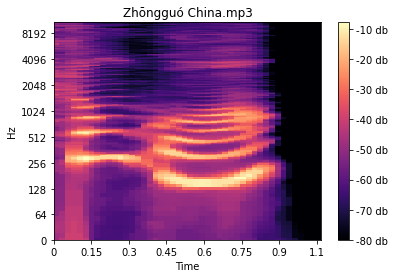

In [610]:
spectro9("Zhōngguó China.mp3") 
        


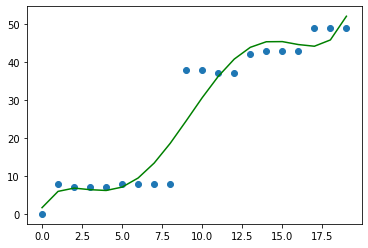

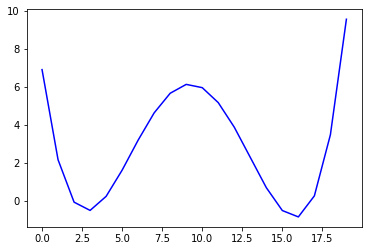

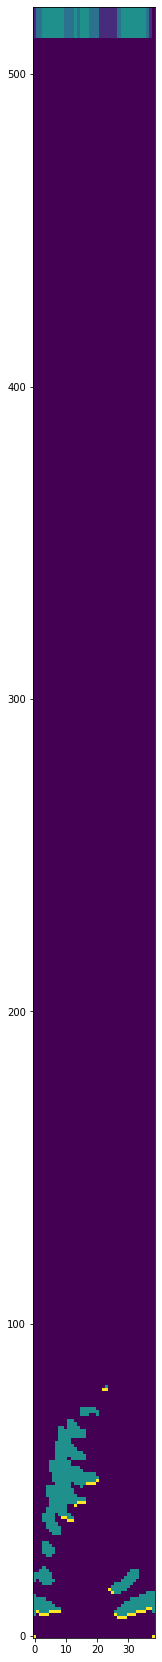

In [10]:


aislamiento_fitting("wan3.mp3",corte=25, exclude=1, agrupacion=0,ventana=1024,hop=500, win = 500)       
 


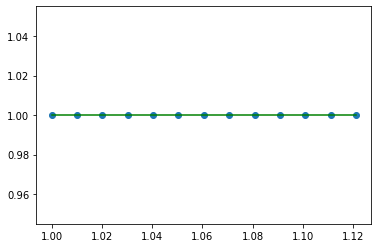

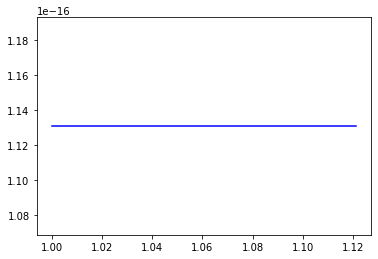

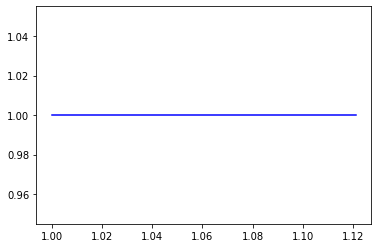

Ratio tono menor / tono mayor  1.0


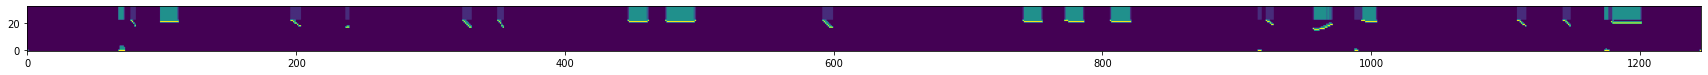

[[], [[0, 68], [0, 69], [0, 70], [0, 71]], [[22, 77], [21, 78], [20, 79]], [[21, 99], [21, 100], [21, 101], [21, 102], [21, 103], [21, 104], [21, 105], [21, 106], [21, 107], [21, 108], [21, 109], [21, 110], [21, 111]], [[22, 196], [22, 197], [21, 198], [20, 199], [20, 200], [19, 201], [18, 202]], [[17, 237], [17, 238]], [[22, 324], [21, 325], [20, 326], [19, 327], [18, 328], [17, 329]], [[22, 350], [21, 351], [20, 352], [18, 353]], [[22, 447], [21, 448], [21, 449], [21, 450], [21, 451], [21, 452], [21, 453], [21, 454], [21, 455], [21, 456], [21, 457], [21, 458], [21, 459], [21, 460], [21, 461]], [[22, 475], [21, 476], [21, 477], [21, 478], [21, 479], [21, 480], [21, 481], [21, 482], [21, 483], [21, 484], [21, 485], [21, 486], [21, 487], [21, 488], [21, 489], [21, 490], [21, 491], [21, 492], [21, 493], [21, 494], [21, 495], [21, 496]], [[22, 592], [21, 593], [20, 594], [19, 595], [18, 596], [17, 597], [17, 598]], [[22, 741], [21, 742], [21, 743], [21, 744], [21, 745], [21, 746], [21, 74

ZeroDivisionError: division by zero

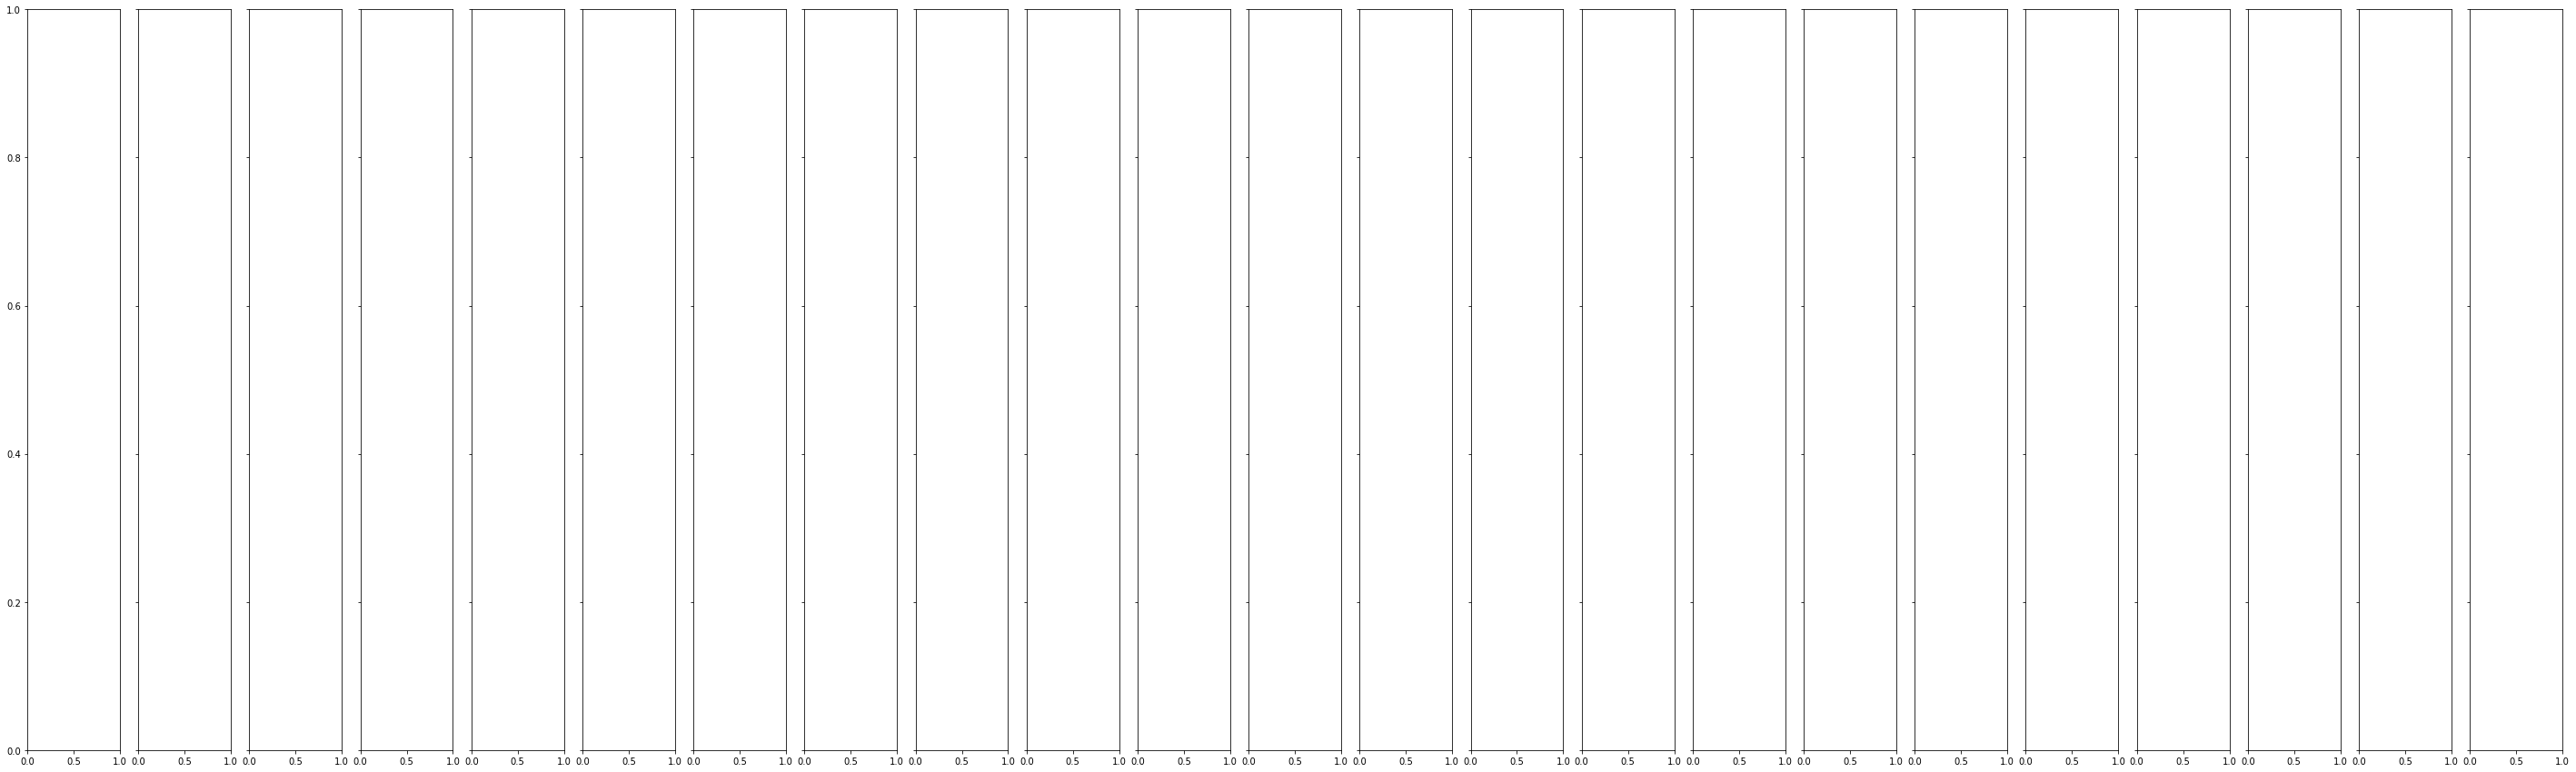

In [910]:
# audio1-1exercise2.mp3
import similaritymeasures

aislamiento_fitting_normalizado("audio1-2exercise3.mp3",corte=10, exclude=0.70, agrupacion=3,ventana=2048,hop=512, win = 1500)    

silabas = aislamiento_fitting_normalizado_conjunto("audio1-2exercise3.mp3",corte=10, exclude=0.70, agrupacion=3,ventana=2048,hop=512, win = 1500, segmentos = 6) 
print(silabas)
fig, axs = plt.subplots(1, len(silabas),sharey=True,figsize=(50,15))

for workin in range(len(silabas)):
    if len(silabas[workin]) != 0:
        X = [x[1] for x in silabas[workin]]
        Y = [x[0] for x in silabas[workin]]
        if Y[0] == 0:
            X = X[2:len(X)]
            Y = Y[2:len(Y)]

        X =  [x/X[0] for x in X]
        Y = [y/Y[0] for y in Y]

        
        axs[workin].plot(X,Y)
    

    





"""
X2, Y2 =  aislamiento_fitting_normalizado("100813_tones_f.mp3",corte=20, exclude=0.70, agrupacion=4,ventana=2048,hop=512, win = 1500) 
silaba2 = np.zeros((len(X2), 2))
silaba2[:, 0] = X2
silaba2[:, 1] = Y2
pcm = similaritymeasures.pcm(silaba1, silaba2)
print(pcm)
"""

In [850]:
np.random.seed(seed=1)
n = len(silaba1)
x = np.random.random(n)
y = np.random.random(n)
exp_data = np.zeros((n, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

fretch_silaba1_silaba2 = similaritymeasures.frechet_dist(silaba1, silaba2)
print(fretch_silaba1_silaba2)
fretch_silaba1_exp_data = similaritymeasures.frechet_dist(silaba1, exp_data)
print(fretch_silaba1_exp_data)

0.16725983697626962
1.2996640198793026


22050


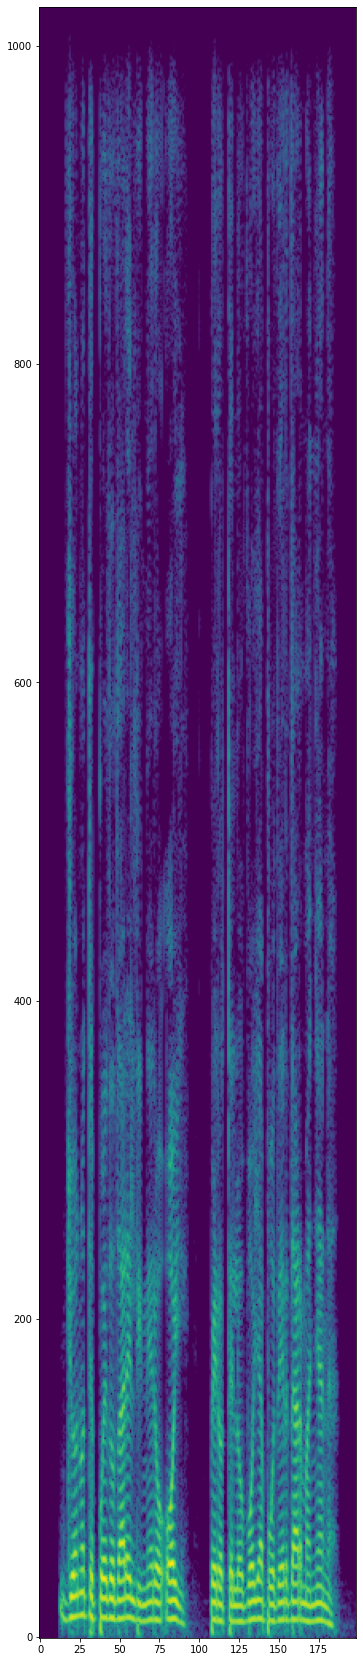

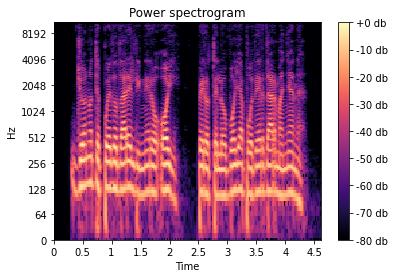

In [827]:

def spectro_matplot(archivo, nfft, hop, win_length):
    # files                                                                         
    src = archivo
    dst = "test.wav"

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    y, sr = librosa.load("test.wav")
    print(sr)
   
    
        
    
    S = np.abs(librosa.stft(y, center = False,n_fft = nfft, hop_length = hop, win_length = win_length ))
    S = librosa.amplitude_to_db(S,ref=np.max)
    
    plt.figure(figsize = (30,30))
    plt.imshow(S,origin="lower")
    plt.show()
    
spectro_matplot("8097.mp3", 2048, 512, 1500)
spectro("8097.mp3")


In [834]:
import numpy as np
import similaritymeasures
import matplotlib.pyplot as plt

# Generate random experimental data
x = np.random.random(100)
y = np.random.random(100)
exp_data = np.zeros((100, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generate random numerical data
x = np.random.random(100)
y = np.random.random(100)
num_data = np.zeros((100, 2))
num_data[:, 0] = x
num_data[:, 1] = y

[[8.00488665e-01 1.38407183e-01]
 [8.37607705e-01 9.44992362e-01]
 [7.70816339e-01 1.23445493e-01]
 [3.35337630e-01 7.86414495e-01]
 [5.03460647e-01 1.86908523e-01]
 [8.94231377e-01 9.39725780e-01]
 [2.60860262e-01 2.17610278e-01]
 [3.82895354e-01 4.57884988e-01]
 [9.03229830e-01 4.39382483e-01]
 [9.43520463e-01 1.81402523e-01]
 [8.76594933e-01 8.79752428e-01]
 [6.88762575e-02 6.60514359e-01]
 [7.62962744e-02 7.43790416e-01]
 [2.16751338e-01 9.10895836e-01]
 [2.03032835e-01 2.40801688e-01]
 [9.82924923e-01 7.24347853e-01]
 [6.00729848e-01 7.24829731e-01]
 [5.91308251e-01 7.66943306e-01]
 [4.38623807e-01 9.71248128e-02]
 [6.49204628e-01 1.84930504e-01]
 [7.30365866e-01 3.24151603e-01]
 [2.29633451e-01 5.74227939e-01]
 [8.49154276e-02 5.00343972e-01]
 [6.07954751e-01 5.84552448e-01]
 [9.63717412e-01 8.24365065e-01]
 [9.05937925e-01 9.70419548e-01]
 [1.45890182e-01 4.92297004e-01]
 [9.80132542e-01 1.45091671e-01]
 [1.67982485e-01 3.53648467e-01]
 [2.77329842e-01 4.96882665e-01]
 [2.106673